Taken from following [YouTube Video Tutorial](https://www.youtube.com/watch?v=PaCmpygFfXo&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=4&ab_channel=AndrejKarpathy)

In [1]:
with open('names.txt') as f:
    names = f.read().splitlines()

In [2]:
names[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
min(len(w) for w in names)

2

In [4]:
max(len(w) for w in names)

15

In [5]:
for w in names[:1]:
    for c1, c2 in zip(w, w[1:]):
        print(c1, c2)

e m
m m
m a


In [6]:
# create bigrams from the names
for w in names[:3]:
    chs = ['<S>'] + list(w) + ['<E>']
    for c1, c2 in zip(chs, chs[1:]):
        print(c1, c2)

<S> e
e m
m m
m a
a <E>
<S> o
o l
l i
i v
v i
i a
a <E>
<S> a
a v
v a
a <E>


In [7]:
def create_bigrams(words_list):
    bigrams_list = []
    for word in words_list:
        words_with_tokens = ["<S>"] + list (word) + ["<E>"]
        for ch1, ch2 in zip(words_with_tokens, words_with_tokens[1:]):
            bigrams_list.append((ch1, ch2))

    return bigrams_list

In [8]:
def create_bigrams_with_counts(words_list):
    bigrams_dict = {}
    for word in words_list:
        words_with_tokens = ["<S>"] + list (word) + ["<E>"]
        for ch1, ch2 in zip(words_with_tokens, words_with_tokens[1:]):
            bigram = (ch1, ch2)
            bigrams_dict[bigram] = bigrams_dict.get(bigram, 0) + 1

    return bigrams_dict

In [9]:
b = create_bigrams_with_counts(names)

In [10]:
sorted(b.items(), key=lambda kv: kv[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [11]:
# store information in 2D array
import torch
N = torch.zeros((28, 28), dtype=torch.int32)

chars = sorted(list(set(''.join(names)))) # concat all names in single string and get unique characters
stoi = {ch: i for i, ch in enumerate(chars)}

stoi['<S>'] = 26
stoi['<E>'] = 27

bigrams_dict = {}

for word in names:
        words_with_tokens = ["<S>"] + list (word) + ["<E>"]
        for ch1, ch2 in zip(words_with_tokens, words_with_tokens[1:]):
            ixt = stoi[ch1]
            ix2 = stoi[ch2]
            N[ixt, ix2] += 1

N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

In [12]:
itos = {i:s for i, s in enumerate(chars)}
itos[26] = '<S>'
itos[27] = '<E>'

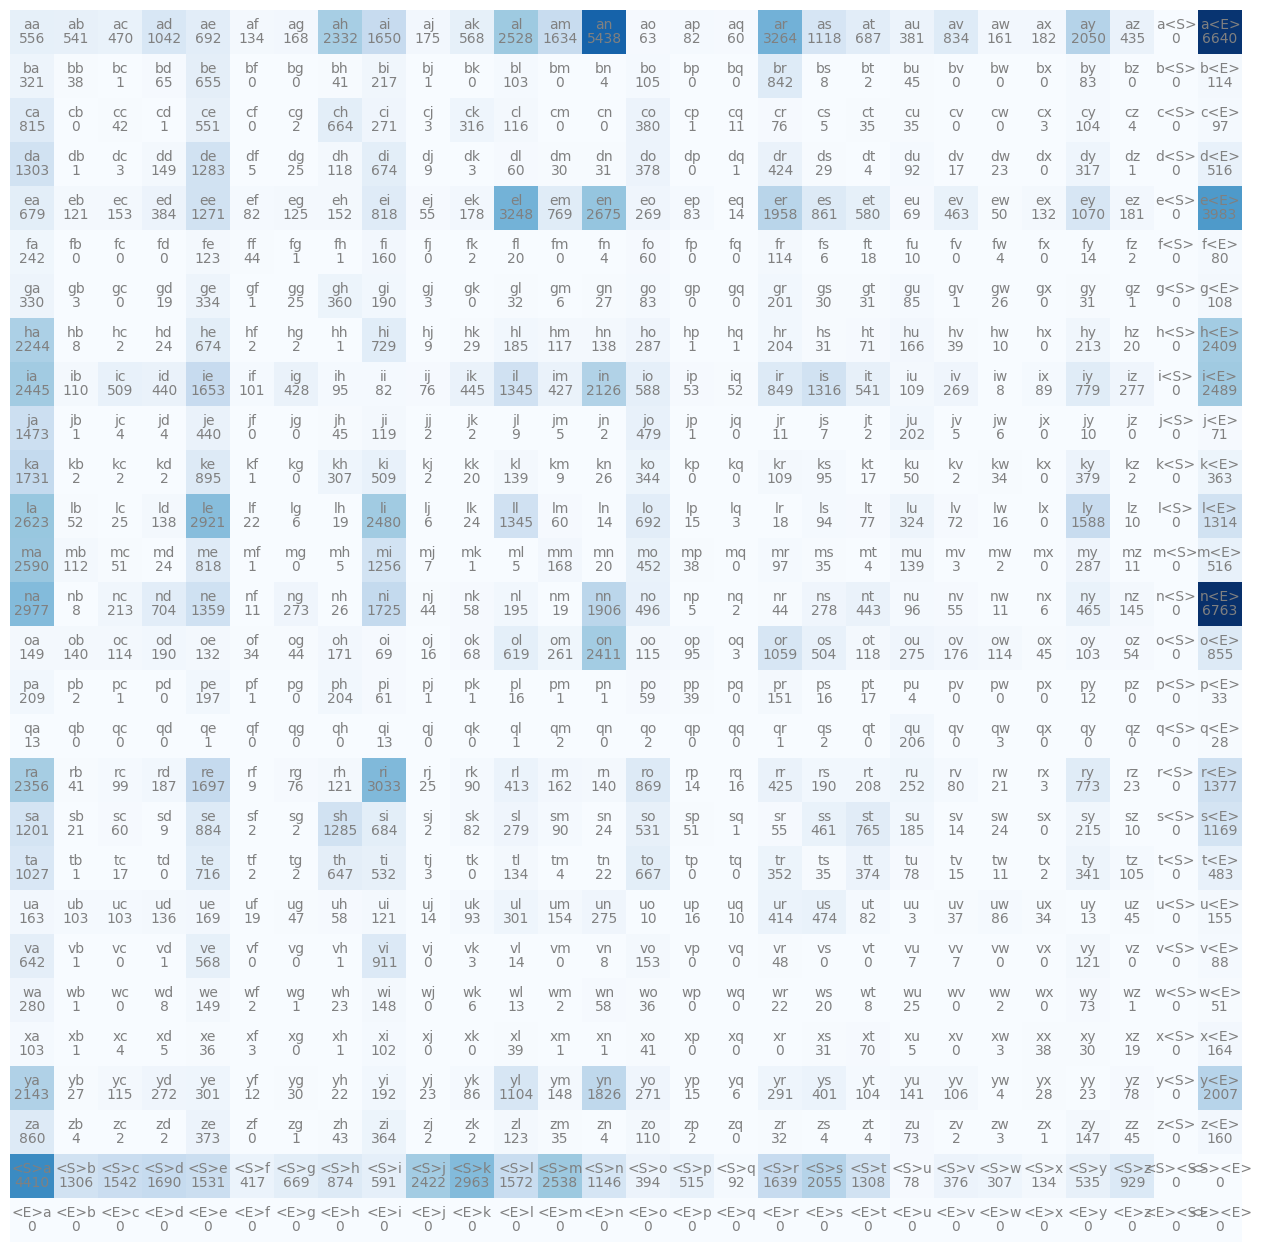

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')

for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")

plt.axis("off");

In [14]:
# going forward we will replace tokens with a new special token '.' and we will use the same token for both start and end tokens
special_token = '.'

# this will reduce the array size:
N = torch.zeros((27, 27), dtype=torch.int32)

stoi = {c: i+1 for i, c in enumerate(chars)}
stoi[special_token] = 0

itos = {i:s for s, i in stoi.items()}

In [15]:
for word in names:
        words_with_tokens = [special_token] + list (word) + [special_token]
        for ch1, ch2 in zip(words_with_tokens, words_with_tokens[1:]):
            ixt = stoi[ch1]
            ix2 = stoi[ch2]
            N[ixt, ix2] += 1

What we will construct now is basically a vizualization of model parameters. The table shows how many times e.g a appeared after m (ma=2590), but this can easily by translated into probabilites (what is the probability that a will follow m).

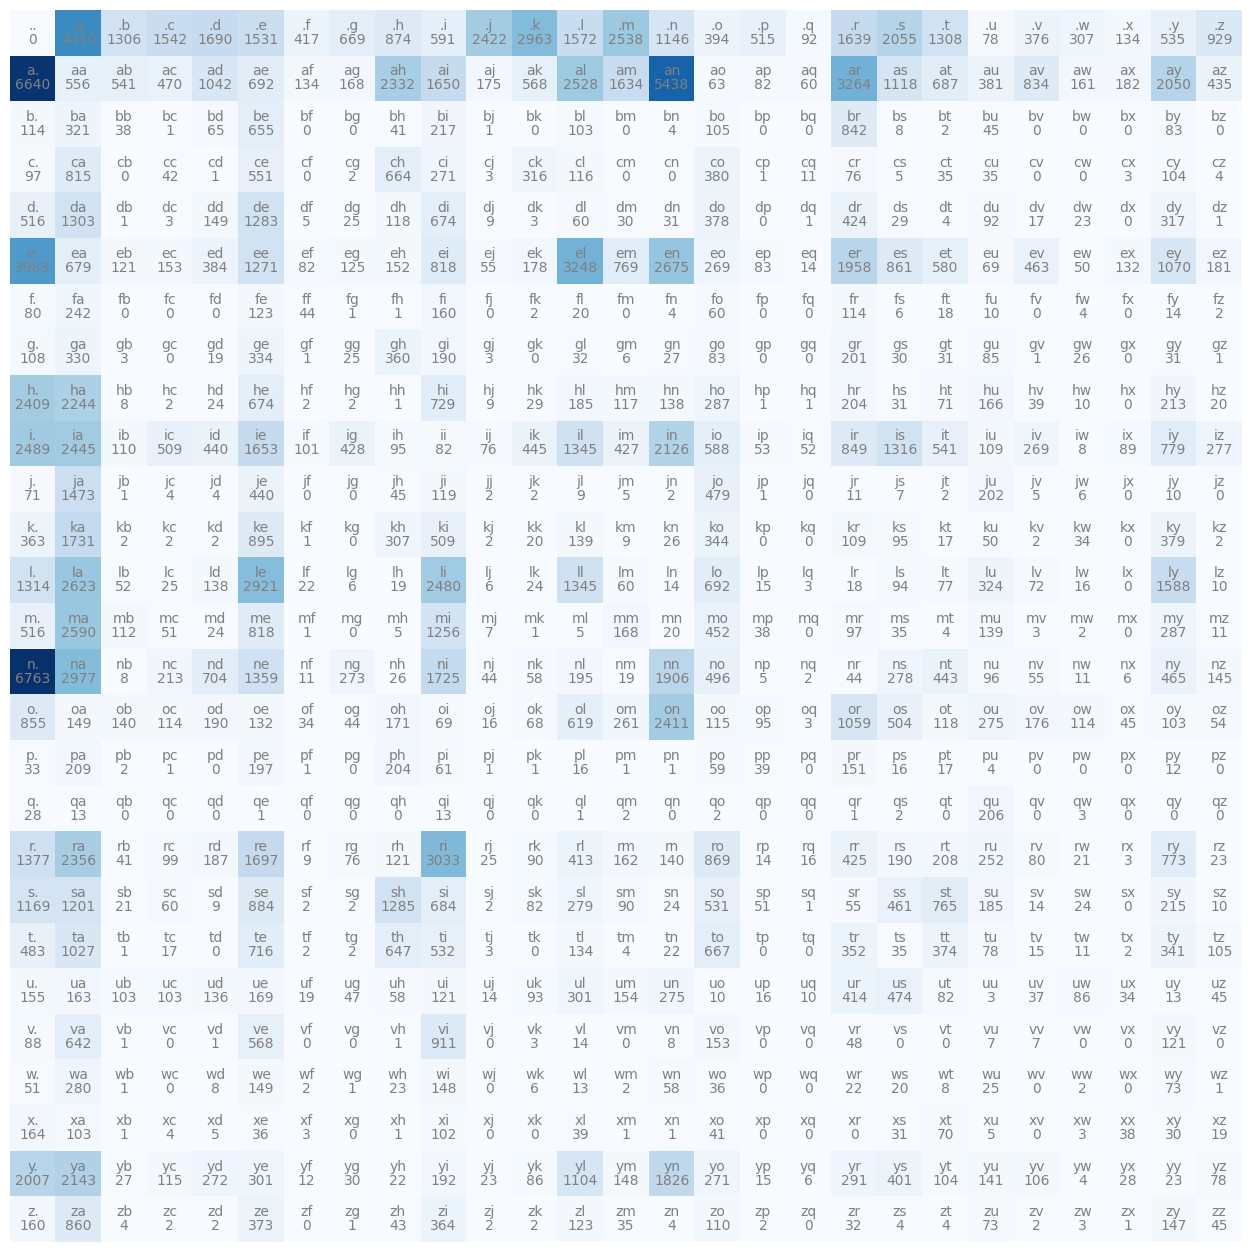

In [16]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")

plt.axis("off");

In [17]:
N[0,:]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [18]:
# convert to probabilites vector so we can start sampling for model
p = N[0].float() / N[0].sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

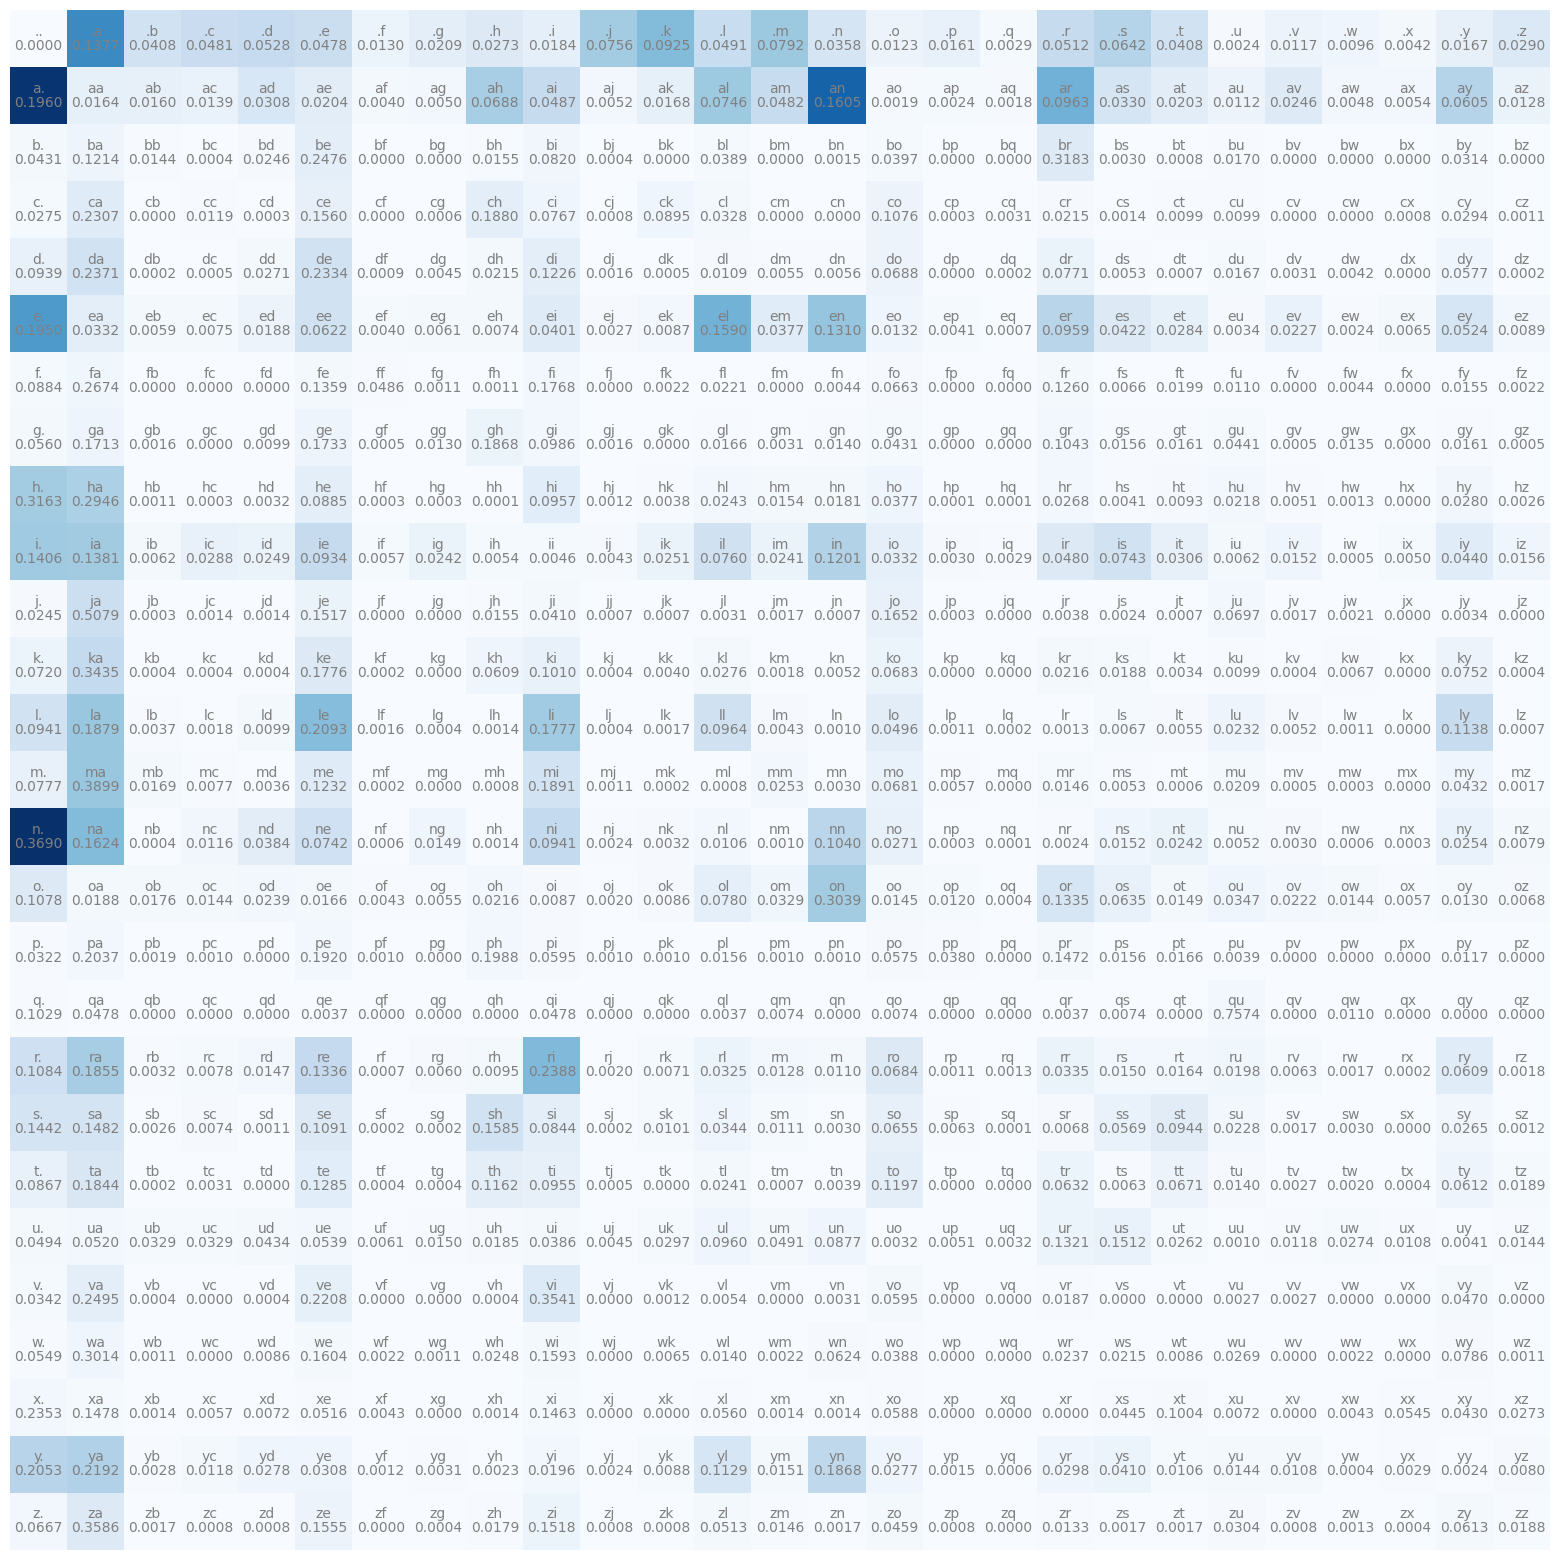

In [19]:
# let's construct a chart of probabilities
plt.figure(figsize=(20, 20))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, '{0:.4f}'.format(N[i, j].item() / N[i].sum().item()), ha="center", va="top", color="gray")

plt.axis("off");

In [20]:
g = torch.Generator().manual_seed(42)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.4047, 0.4197, 0.1756])

In [21]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)


tensor([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2])

In [22]:
# now let's sample from the model
s = N[0].float() / N[0].sum()
idx_s = torch.multinomial(s, num_samples=1, replacement=True, generator=g).item()
itos[idx_s]

'a'

In [23]:
# preparing the tensor for probabilities makes it more efficient then computing everytime
P = (N + 1).float() # +1 sp that we elminiate 0 probabilities (e.h. q follows j) and we are preventing inf as a result of loss fn
P /= P.sum(dim=1, keepdim=True)

In [24]:
P.sum(dim=1, keepdim=True).shape


torch.Size([27, 1])

In [25]:
P.shape

torch.Size([27, 27])

In [26]:
P[25].sum() # sum across the row to get the probability of the next character should be 1

tensor(1.)

In [27]:
g = torch.Generator().manual_seed(42)

for i in range(5):
    idx = 0
    out = []
    while True:
        p = P[idx]
        # p = N[idx].float()
        p = p / p.sum()
        idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[idx])
        if idx == 0:
            break

    print(''.join(out))


ya.
syahavilin.
dleekahmangonya.
tryahe.
chen.


### Loss function

Let's evaluate the quality of the model - how good does it predict the next character

In [28]:
log_likelyhood = 0.0
n = 0
for word in names[:3]:
        words_with_tokens = [special_token] + list (word) + [special_token]
        for ch1, ch2 in zip(words_with_tokens, words_with_tokens[1:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            prob = P[ix1, ix2]
            logprob = torch.log(prob)
            log_likelyhood += logprob
            n += 1
            print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
print(f'{log_likelyhood=}')
nll = -log_likelyhood
print(f'{nll/n}')


.e: 0.0478 -3.0410
em: 0.0377 -3.2793
mm: 0.0253 -3.6753
ma: 0.3885 -0.9454
a.: 0.1958 -1.6305
.o: 0.0123 -4.3965
ol: 0.0779 -2.5526
li: 0.1774 -1.7293
iv: 0.0152 -4.1845
vi: 0.3508 -1.0476
ia: 0.1380 -1.9807
a.: 0.1958 -1.6305
.a: 0.1376 -1.9835
av: 0.0246 -3.7041
va: 0.2473 -1.3971
a.: 0.1958 -1.6305
log_likelyhood=tensor(-38.8086)
2.4255354404449463


### NN approach to train the model

In [32]:
xs, ys = [], []

for word in names[:1]:
        words_with_tokens = [special_token] + list (word) + [special_token]
        for ch1, ch2 in zip(words_with_tokens, words_with_tokens[1:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            print(ch1, ch2)
            xs.append(ix1)
            ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [33]:
xs

tensor([ 0,  5, 13, 13,  1])

In [34]:
ys

tensor([ 5, 13, 13,  1,  0])

Interpretation of results above:

For input to NN being 0, the desired label is 5; for input to NN of 5 we want to adjust weights so that ouput is 13.

In [ ]:
# now let's feed the exemples into the neural network